In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import cv2
import glob
import matplotlib.pyplot as plt

In [ ]:
'''
USED USER DEFINED IMAGES FOR TRAINING OF MODEL
'''

'\nUSED USER DEFINED IMAGES FOR TRAINING OF MODEL\n'

In [ ]:
seed = 10
np.random.seed(seed)

In [ ]:
#get all images from inputs
IMAGEFORTRAIN = sorted(glob.glob("/content/imagetraining/*"))
IMAGEFORTEST= sorted(glob.glob("/content/imagetesting/*"))
IMAGEEQUATION=sorted(glob.glob("/content/givenequation/*"))

In [ ]:
def getimages(pic):
    z = cv2.imread(pic)          #READ USING CV2 LIB
    z = cv2.cvtColor(z,cv2.COLOR_BGR2RGB) #CONVERT TO RGB 
    return z

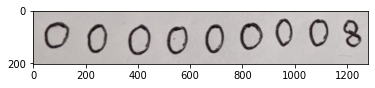

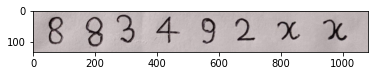

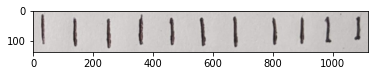

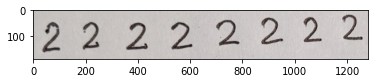

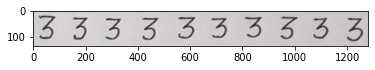

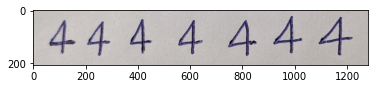

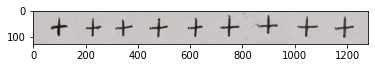

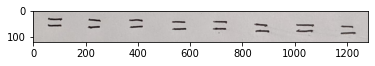

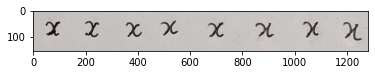

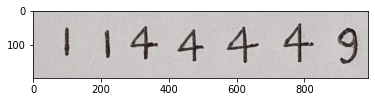

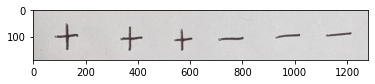

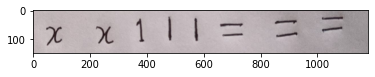

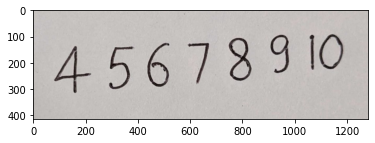

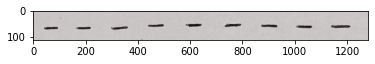

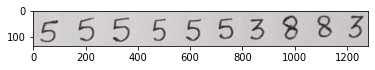

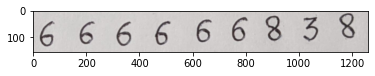

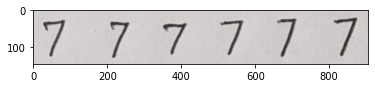

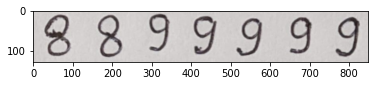

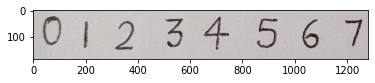

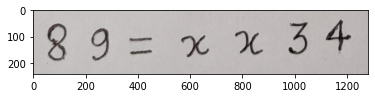

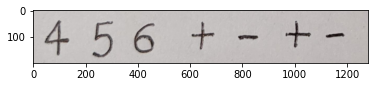

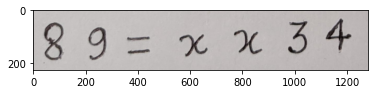

In [ ]:
#display all images used for training
for trimg in IMAGEFORTRAIN:
    pictrain = getimages(trimg)
    plt.imshow(pictrain)
    plt.show()

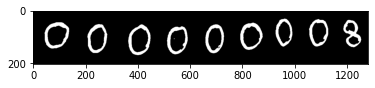

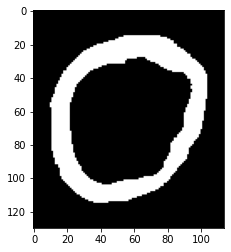

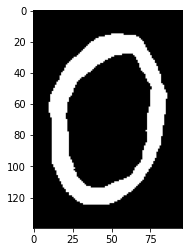

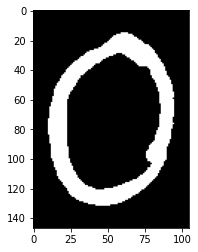

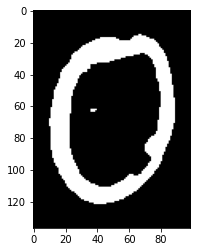

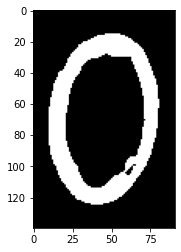

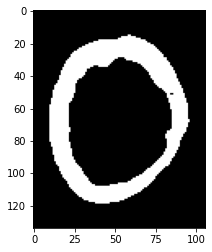

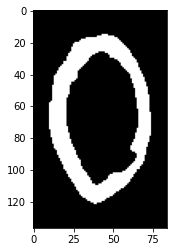

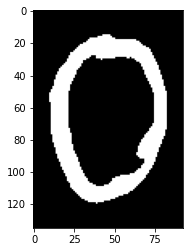

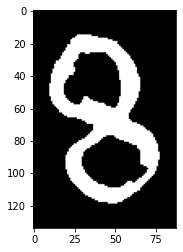

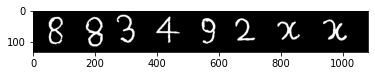

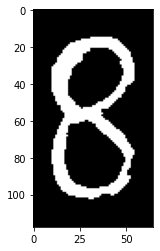

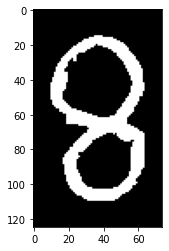

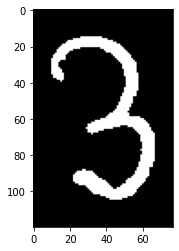

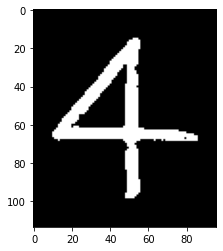

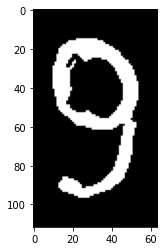

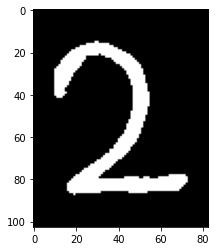

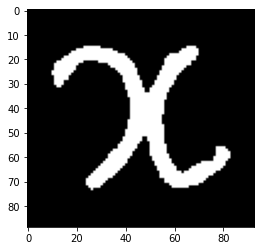

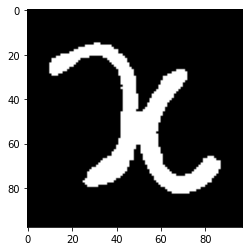

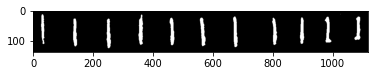

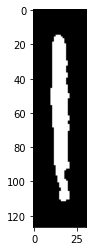

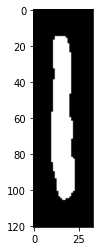

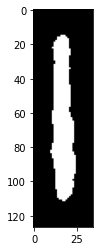

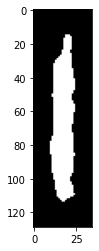

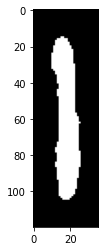

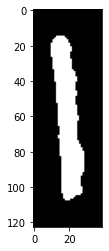

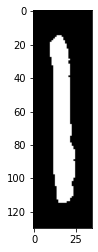

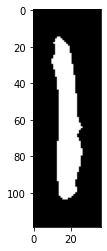

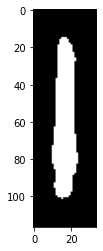

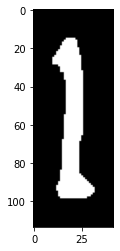

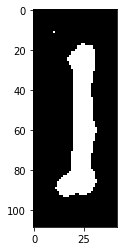

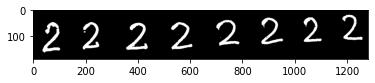

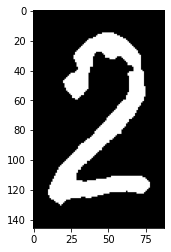

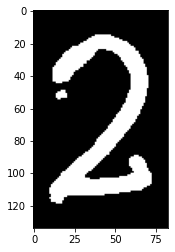

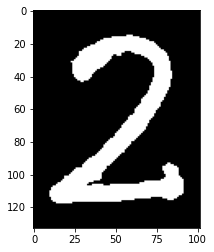

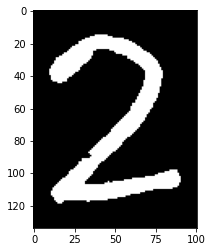

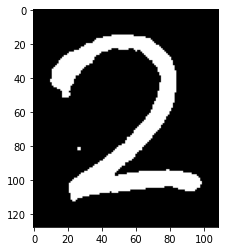

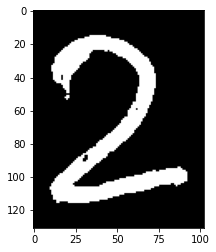

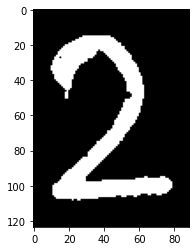

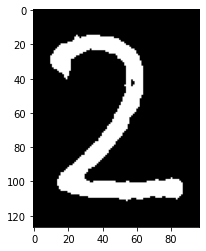

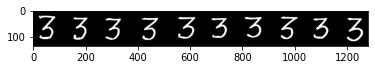

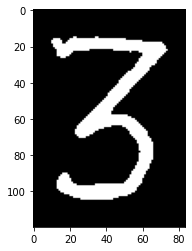

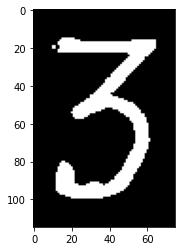

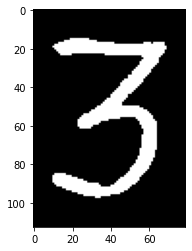

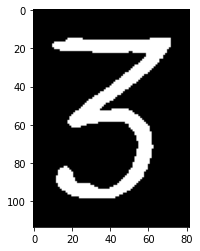

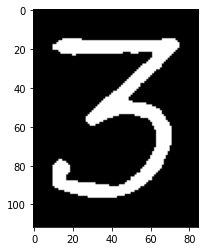

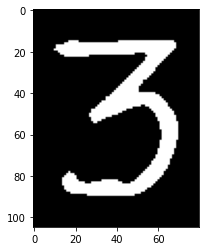

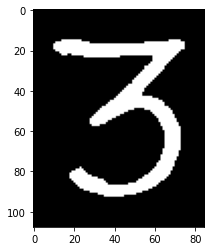

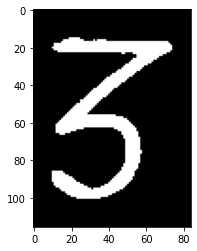

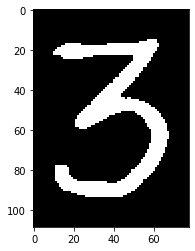

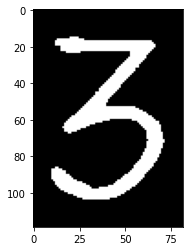

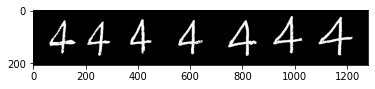

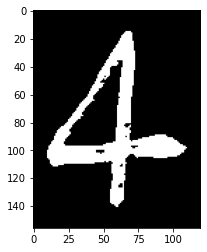

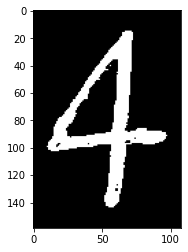

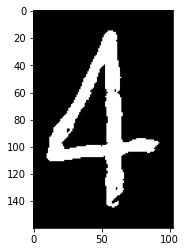

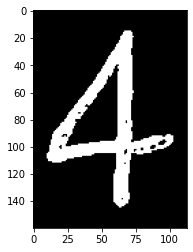

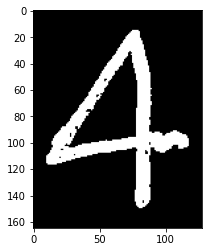

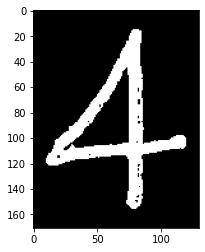

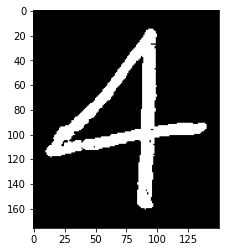

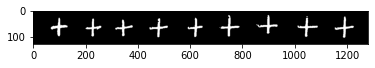

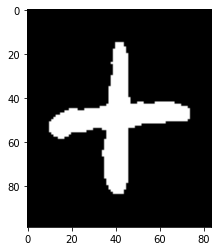

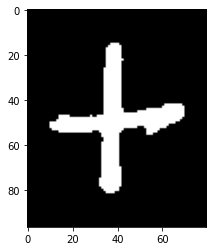

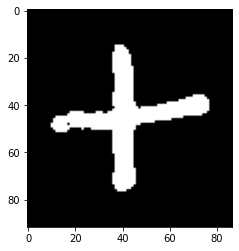

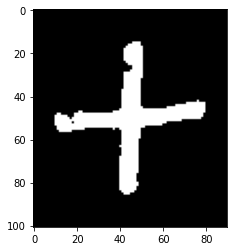

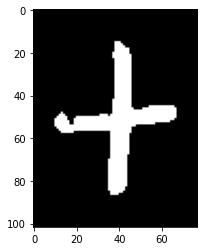

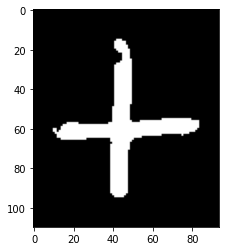

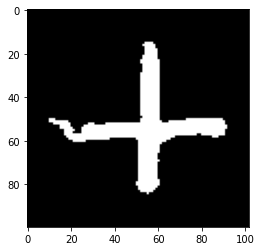

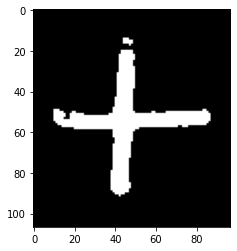

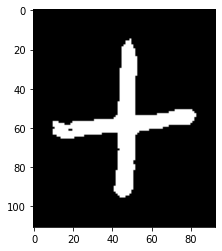

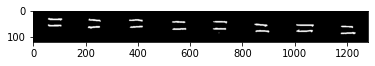

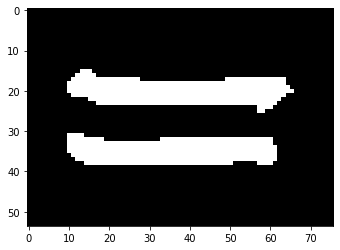

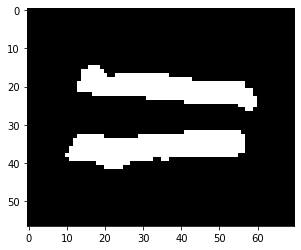

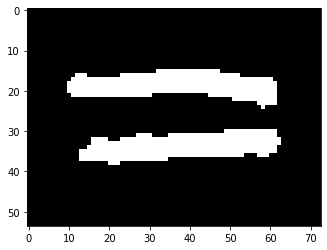

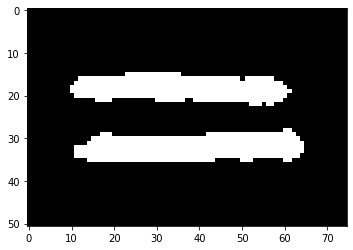

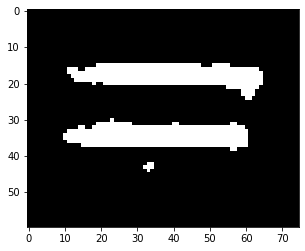

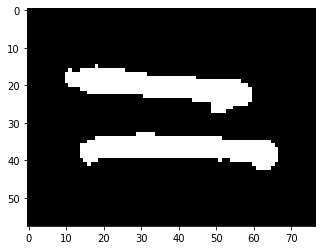

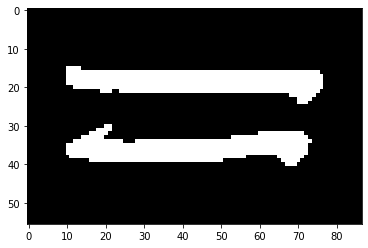

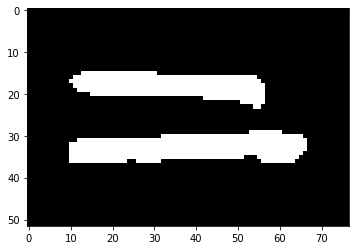

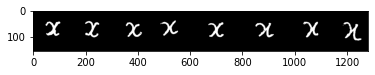

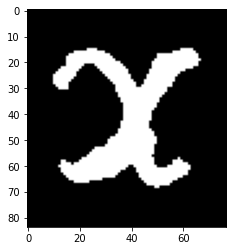

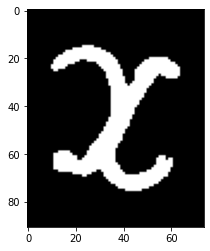

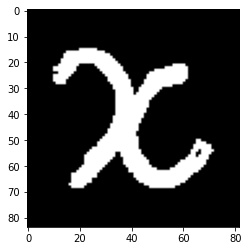

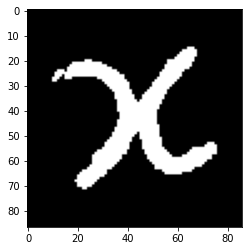

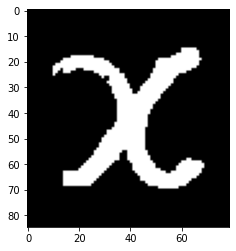

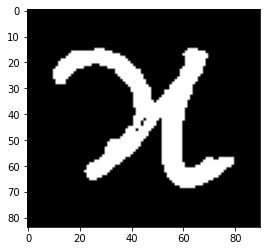

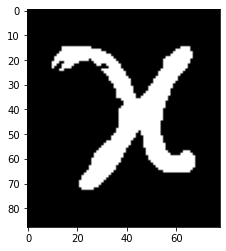

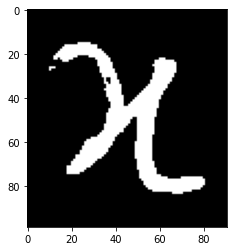

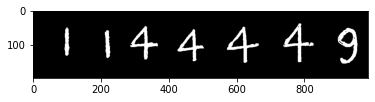

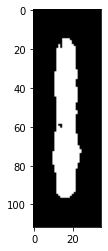

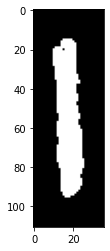

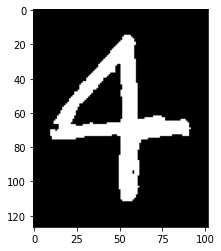

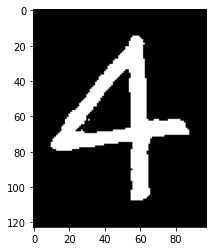

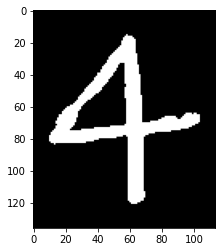

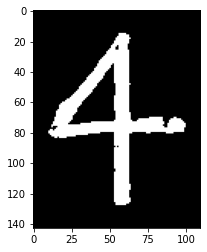

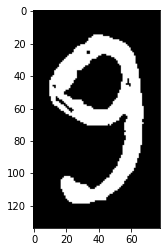

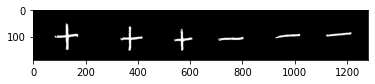

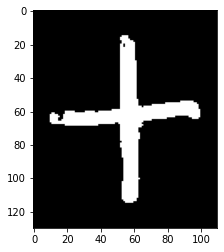

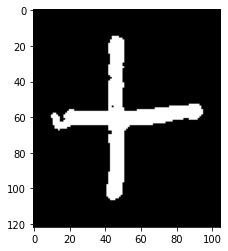

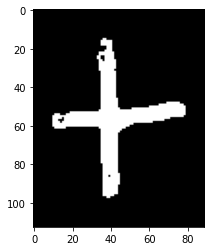

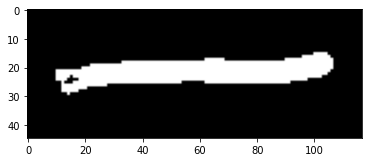

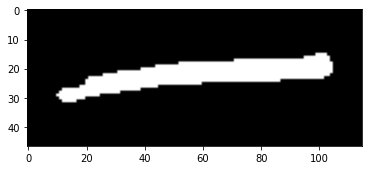

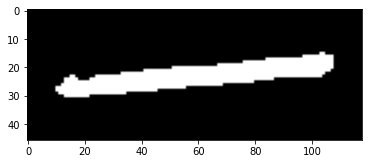

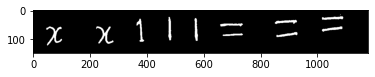

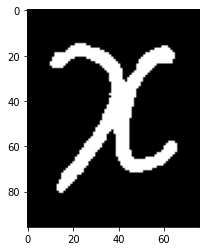

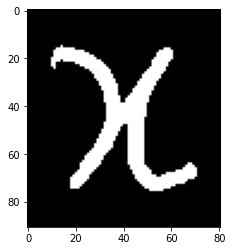

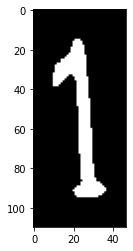

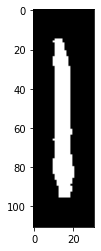

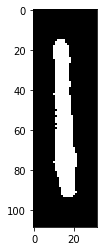

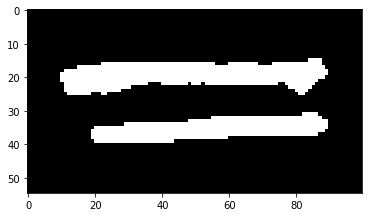

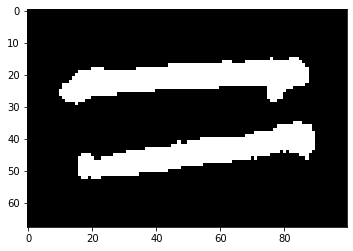

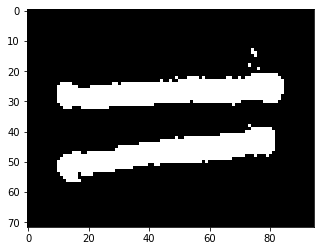

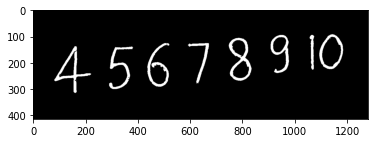

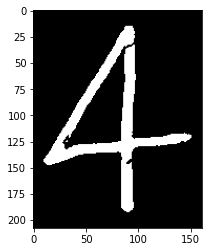

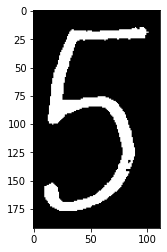

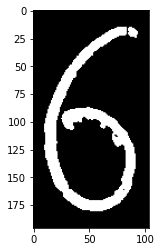

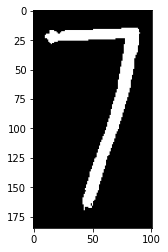

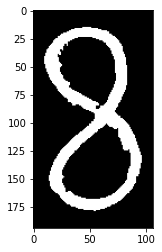

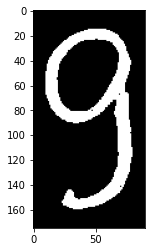

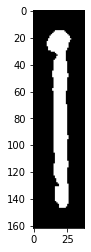

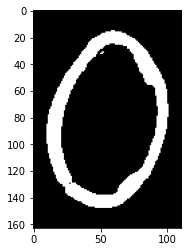

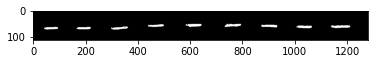

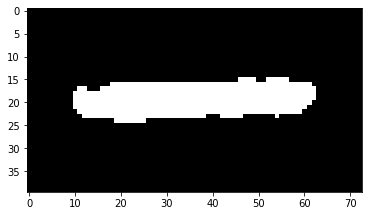

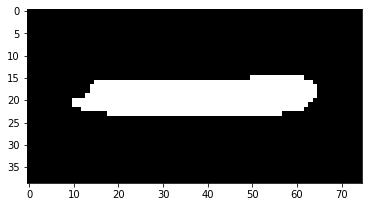

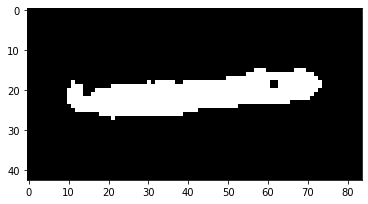

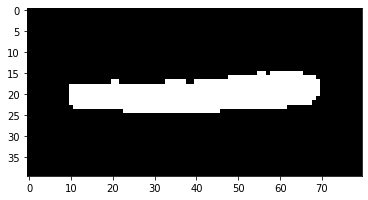

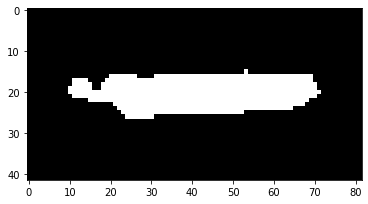

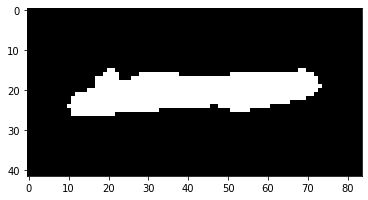

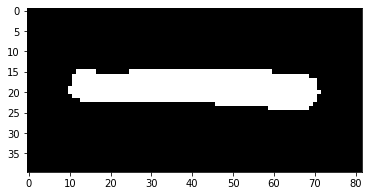

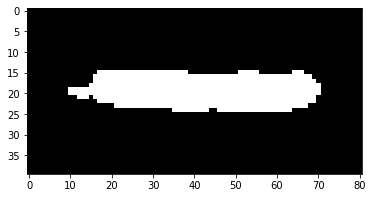

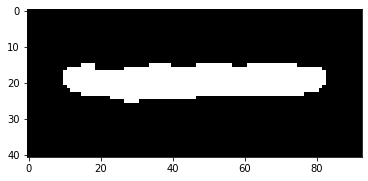

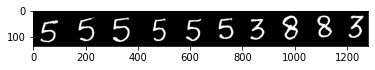

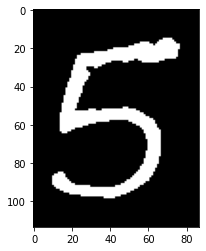

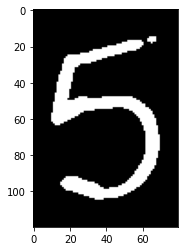

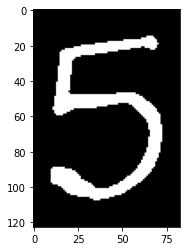

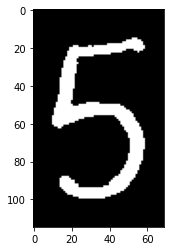

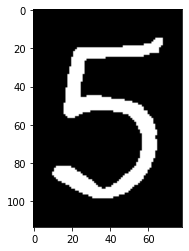

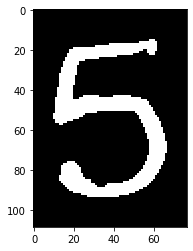

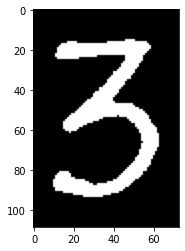

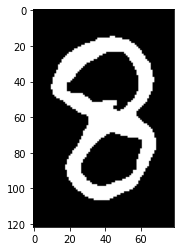

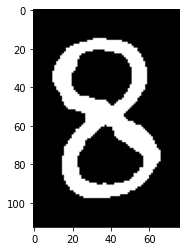

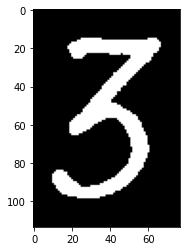

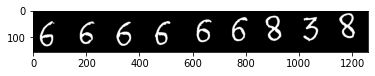

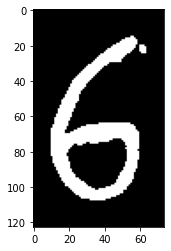

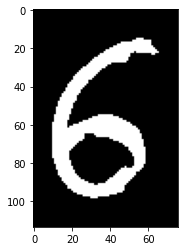

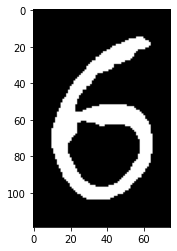

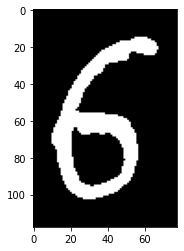

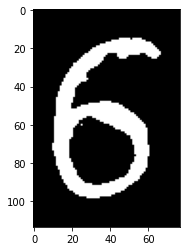

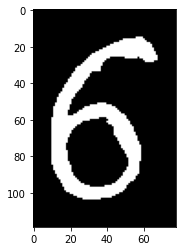

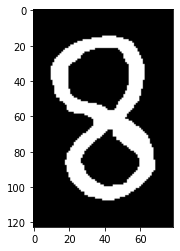

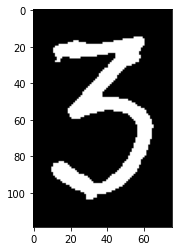

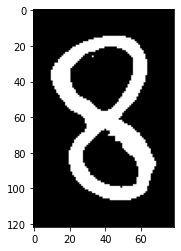

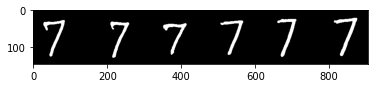

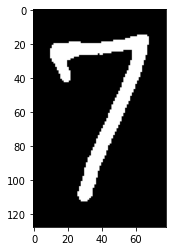

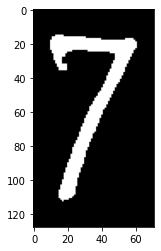

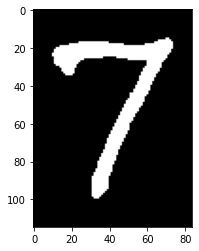

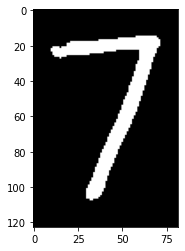

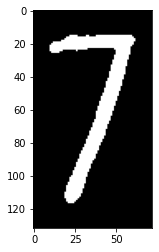

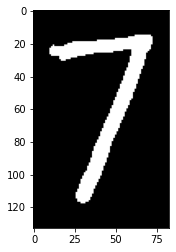

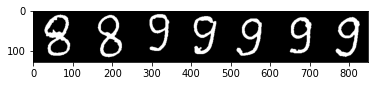

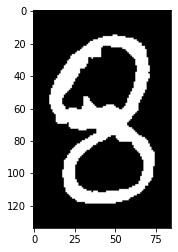

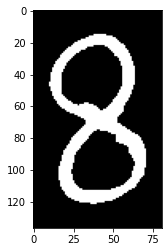

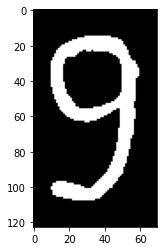

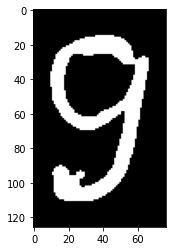

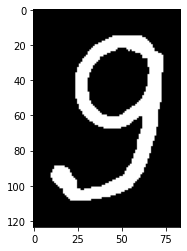

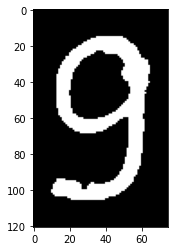

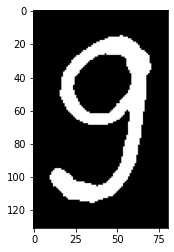

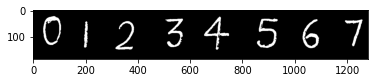

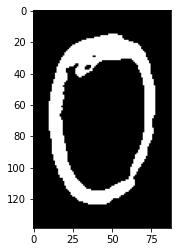

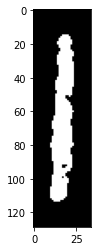

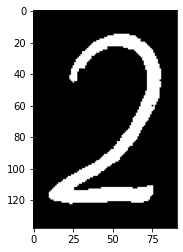

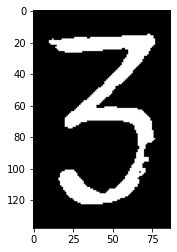

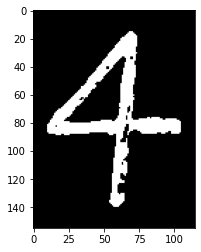

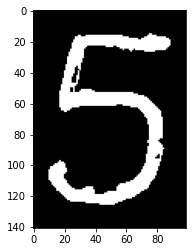

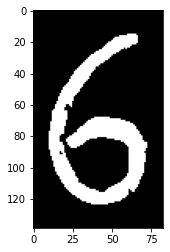

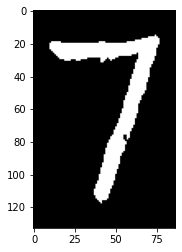

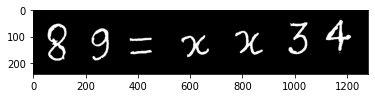

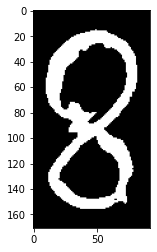

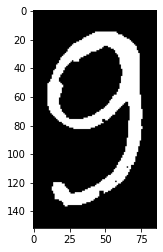

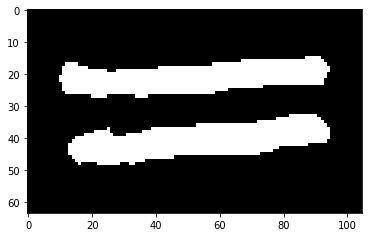

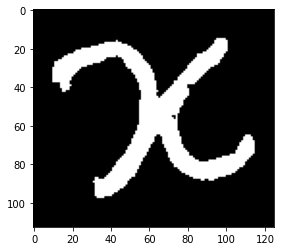

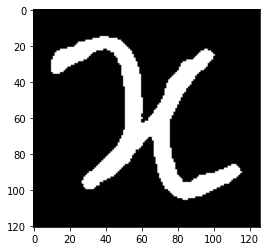

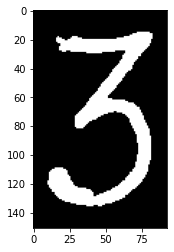

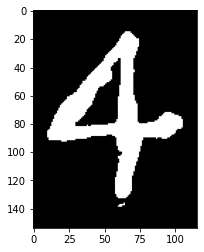

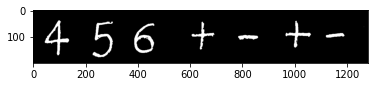

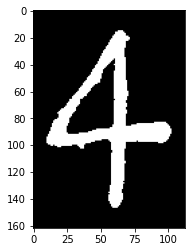

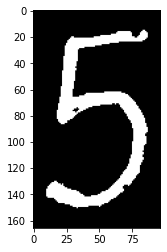

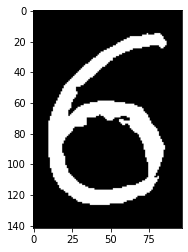

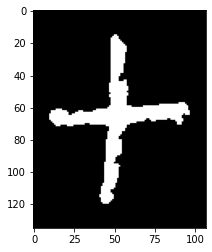

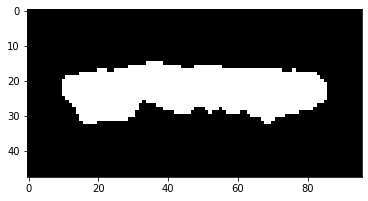

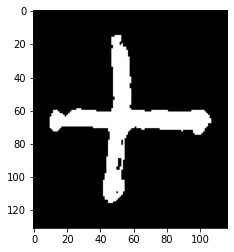

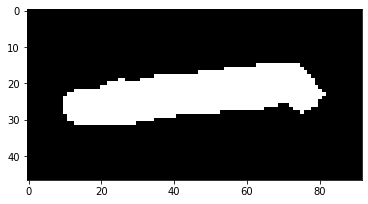

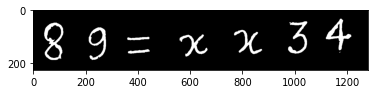

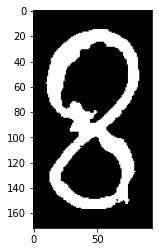

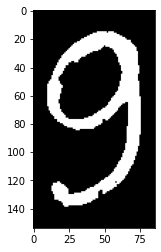

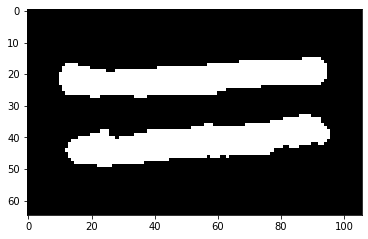

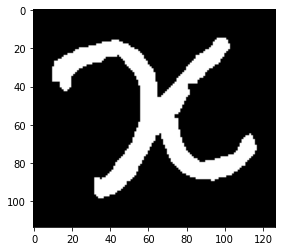

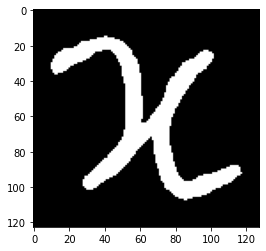

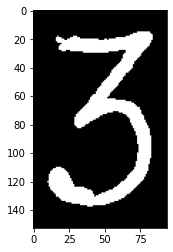

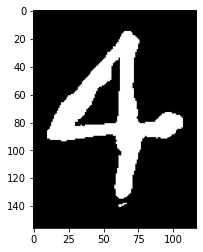

In [ ]:
arrayfortrainimg=[]
#another list for no padding in the end
flistNoPad=[]
for imgs in IMAGEFORTRAIN:
    temppic = getimages(imgs)
    valpix = temppic.reshape((-1, 3))
    valpix = np.float32(valpix)
    #K means with k=2
    new_c = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    t1, t2, (t3) = cv2.kmeans(valpix, k, None,new_c, 10, cv2.KMEANS_RANDOM_CENTERS)
    t3 = np.uint8(t3)
    t3_arr=np.uint8([[255,255,255],[0,0,0]])
    t2 = t2.flatten()
    seg_pix = t3_arr[t2.flatten()]
    seg_pix = seg_pix.reshape(temppic.shape)
    if(seg_pix[0,0,0]!=0):
        seg_pix=~seg_pix
    plt.imshow(seg_pix)#DISPLAY ALL SEGEMENTED IMAGES
    plt.show()
    final=seg_pix
    mark=0
    f1=0
    last=0
    imglist=[]
    second_mark=0
    f1_x=0
    
    #Seperation of operations from digits and alphabet 'x' 
    for i in range(final.shape[1]-6):
        if np.sum(final[:,i,0])==0 :
            if np.sum(final[:,f1_x+6,0])==0 :
                second_mark=0
            if np.sum(final[:,f1_x+6,0])!=0 :
                if mark==1:
                    if np.sum(final[:,i+4,0])==0:
                        end=i
                        imglist.append(final[:,f1:end+2,:])
                        f1=i+2
                        second_mark=0
                        mark=0

                continue
        if np.sum(final[:,i,0])!=0:
            if second_mark==0:
                f1_x=i
            second_mark=1
            mark=1
            continue
    #REMOVAL OF BLACK PIXELS FROM BORDERS OF CHARACTERS       
    for cnt in range(len(imglist)):       
        v_x=np.var(imglist[cnt][:,:,0],axis=0)
        v_y=np.var(imglist[cnt][:,:,0],axis=1)
        #IF CHAR IS '=',THEN REMOVAL OF INDICES IS NOT NEEDED
        x0=[i for i in list(range(len(v_x))) if v_x[i]==0]
        x1=[i for i in list(range(len(v_y)-5)) if v_y[i]==0 and np.sum(v_y[i+5])==0]
        final_img=imglist[cnt]
        final_img=np.delete(final_img,x0,axis=1)
        final_img=np.delete(final_img,x1,axis=0)
        flistNoPad.append(final_img)
        final_img=np.pad(final_img[:,:,0],pad_width=10,mode='constant',constant_values=0)
        final_img=np.repeat(final_img[:,:,np.newaxis],3,axis=2)
        plt.imshow(final_img)
        plt.show()
        arrayfortrainimg.append(final_img) 

In [ ]:
#training label
y_train=[0,0,0,0,0,0,0,0,8,8,8,3,4,9,2,13,13,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,1,1,4,4,4,4,9,10,10,10,11,11,11,13,13,1,1,1,12,12,12,4,5,6,7,8,9,1,0,11,11,11,11,11,11,11,11,11,5,5,5,5,5,5,3,8,8,3,6,6,6,6,6,6,8,3,8,7,7,7,7,7,7,8,8,9,9,9,9,9,0,1,2,3,4,5,6,7,8,9,12,13,13,3,4,4,5,6,10,11,10,11,8,9,12,13,13,3,4]        

In [ ]:
len(arrayfortrainimg)#TOTAL TRAINING IMAGES

177

In [ ]:
len(y_train)

177

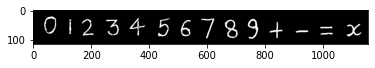

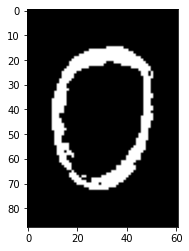

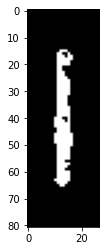

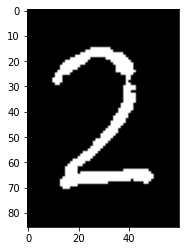

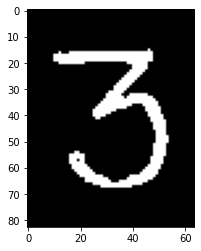

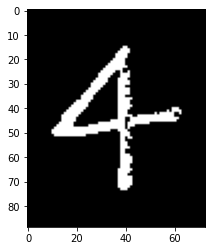

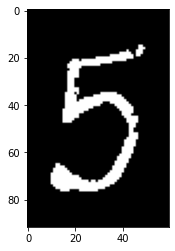

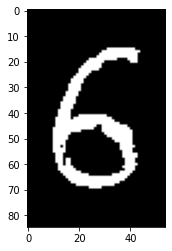

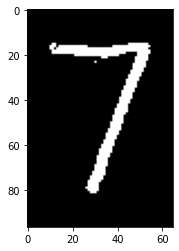

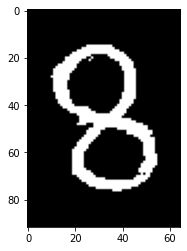

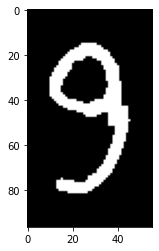

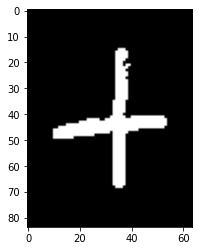

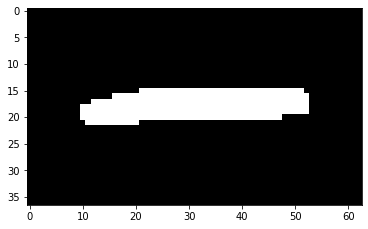

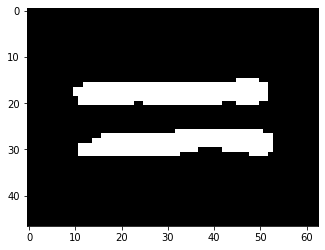

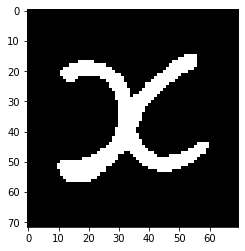

In [ ]:
arrayfortestimg=[]
#another data for no padding in the end
testnopadlist=[]
for imgs in IMAGEFORTEST:
    temppic = getimages(imgs)
    valpix = temppic.reshape((-1, 3))
    valpix = np.float32(valpix)
    #K means with k=2
    new_c = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    t1, t2, (t3) = cv2.kmeans(valpix, k, None,new_c, 10, cv2.KMEANS_RANDOM_CENTERS)
    t3 = np.uint8(t3)
    t3_arr=np.uint8([[255,255,255],[0,0,0]])
    t2 = t2.flatten()
    seg_pix = t3_arr[t2.flatten()]
    seg_pix = seg_pix.reshape(temppic.shape)
    if(seg_pix[0,0,0]!=0):
        seg_pix=~seg_pix
    plt.imshow(seg_pix)#DISPLAY ALL SEGEMENTED IMAGES
    plt.show()
    final=seg_pix
    mark=0
    f1=0
    last=0
    imglist=[]
    second_mark=0
    f1_x=0
    
    #Seperation of operations from digits and alphabet 'x' 
    for i in range(final.shape[1]-6):
        if np.sum(final[:,i,0])==0 :
            if np.sum(final[:,f1_x+6,0])==0 :
                second_mark=0
            if np.sum(final[:,f1_x+6,0])!=0 :
                if mark==1:
                    if np.sum(final[:,i+4,0])==0:
                        end=i
                        imglist.append(final[:,f1:end+2,:])
                        f1=i+2
                        second_mark=0
                        mark=0

                continue
        if np.sum(final[:,i,0])!=0:
            if second_mark==0:
                f1_x=i
            second_mark=1
            mark=1
            continue
    #REMOVAL OF BLACK PIXELS FROM BORDERS OF CHARACTERS       
    for cnt in range(len(imglist)):       
        v_x=np.var(imglist[cnt][:,:,0],axis=0)
        v_y=np.var(imglist[cnt][:,:,0],axis=1)
        #IF CHAR IS '=',THEN REMOVAL OF INDICES IS NOT NEEDED
        x0=[i for i in list(range(len(v_x))) if v_x[i]==0]
        x1=[i for i in list(range(len(v_y)-5)) if v_y[i]==0 and np.sum(v_y[i+5])==0]
        final_img=imglist[cnt]
        final_img=np.delete(final_img,x0,axis=1)
        final_img=np.delete(final_img,x1,axis=0)
        testnopadlist.append(final_img)
        final_img=np.pad(final_img[:,:,0],pad_width=10,mode='constant',constant_values=0)
        final_img=np.repeat(final_img[:,:,np.newaxis],3,axis=2)
        plt.imshow(final_img)
        plt.show()
        arrayfortestimg.append(final_img)
        

In [ ]:
#test labels
y_test=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]

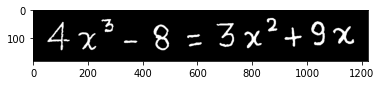

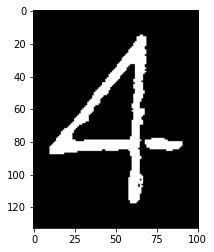

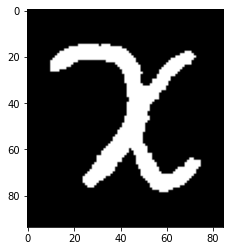

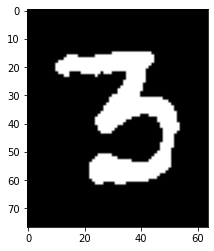

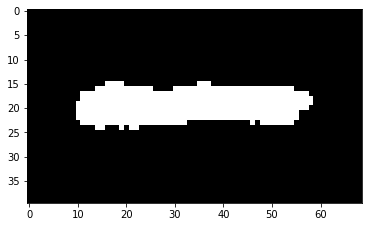

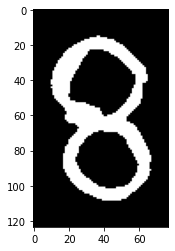

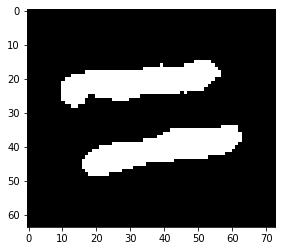

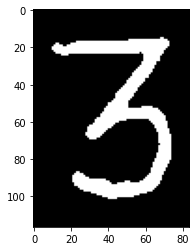

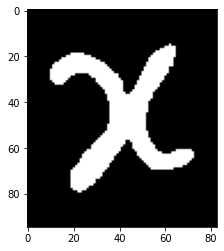

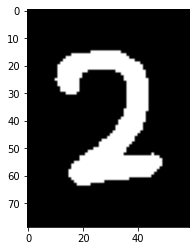

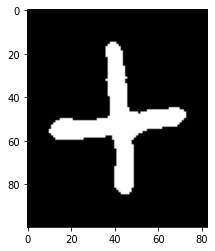

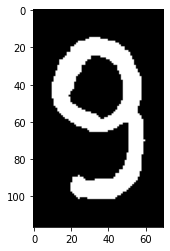

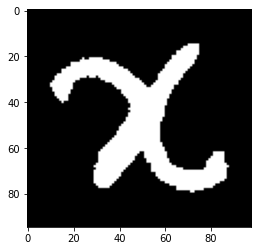

In [ ]:
arrayforeqimage=[]
#another data for no padding in the end
eqnopadlist=[]
for imgs in IMAGEEQUATION:
    temppic = getimages(imgs)
    valpix = temppic.reshape((-1, 3))
    valpix = np.float32(valpix)
    #K means with k=2
    new_c = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    t1, t2, (t3) = cv2.kmeans(valpix, k, None,new_c, 10, cv2.KMEANS_RANDOM_CENTERS)
    t3 = np.uint8(t3)
    t3_arr=np.uint8([[255,255,255],[0,0,0]])
    t2 = t2.flatten()
    seg_pix = t3_arr[t2.flatten()]
    seg_pix = seg_pix.reshape(temppic.shape)
    if(seg_pix[0,0,0]!=0):
        seg_pix=~seg_pix
    plt.imshow(seg_pix)#DISPLAY ALL SEGEMENTED IMAGES
    plt.show()
    final=seg_pix
    mark=0
    f1=0
    last=0
    imglist=[]
    second_mark=0
    f1_x=0
    
    #Seperation of operations from digits and alphabet 'x' 
    for i in range(final.shape[1]-6):
        if np.sum(final[:,i,0])==0 :
            if np.sum(final[:,f1_x+6,0])==0 :
                second_mark=0
            if np.sum(final[:,f1_x+6,0])!=0 :
                if mark==1:
                    if np.sum(final[:,i+4,0])==0:
                        end=i
                        imglist.append(final[:,f1:end+2,:])
                        f1=i+2
                        second_mark=0
                        mark=0

                continue
        if np.sum(final[:,i,0])!=0:
            if second_mark==0:
                f1_x=i
            second_mark=1
            mark=1
            continue
    #REMOVAL OF BLACK PIXELS FROM BORDERS OF CHARACTERS       
    for cnt in range(len(imglist)):       
        v_x=np.var(imglist[cnt][:,:,0],axis=0)
        v_y=np.var(imglist[cnt][:,:,0],axis=1)
        #IF CHAR IS '=',THEN REMOVAL OF INDICES IS NOT NEEDED
        x0=[i for i in list(range(len(v_x))) if v_x[i]==0]
        x1=[i for i in list(range(len(v_y)-5)) if v_y[i]==0 and np.sum(v_y[i+5])==0]
        final_img=imglist[cnt]
        final_img=np.delete(final_img,x0,axis=1)
        final_img=np.delete(final_img,x1,axis=0)
        eqnopadlist.append(final_img)
        final_img=np.pad(final_img[:,:,0],pad_width=10,mode='constant',constant_values=0)
        final_img=np.repeat(final_img[:,:,np.newaxis],3,axis=2)
        plt.imshow(final_img)
        plt.show()
    arrayforeqimage.append(final_img)

In [ ]:
#equations label 
eq_test=[4,13,3,11,8,12,3,13,2,10,9,13]

In [ ]:
row_train=np.array([k.shape[0] for k in arrayfortrainimg])
column_train=np.array([k.shape[1] for k in arrayfortrainimg])
#print("ROWS OF TRAINING ARRAY: ",row_train)
#print("COLUMNS OF TRAINNG ARRAY: ",column_train)
flistNoPad=flistNoPad
leng2=len(flistNoPad)
nRows2=np.array([k.shape[0] for k in flistNoPad])
nCols2=np.array([k.shape[1] for k in flistNoPad])

In [ ]:
#resizing
pixel_size = (80, 150)
pad_size=(60,120)
train=arrayfortrainimg
train2=flistNoPad
test=arrayfortestimg
test2=testnopadlist
eq=arrayforeqimage
eq2=eqnopadlist
# resize image
for i in range(len(arrayfortrainimg)):
    train[i] = cv2.resize(arrayfortrainimg[i], pixel_size)
for i in range(leng2):
    train2[i] = cv2.resize(flistNoPad[i], pad_size)   
for i in range(len(test)):
    test[i] = cv2.resize(arrayfortestimg[i], pixel_size)  
for i in range(len(test2)):
    test2[i] = cv2.resize(testnopadlist[i], pad_size) 
for i in range(len(eq)):
    eq[i] = cv2.resize(arrayforeqimage[i], pixel_size)  
for i in range(len(eq2)):
    eq2[i] = cv2.resize(eqnopadlist[i], pad_size) 

In [ ]:
#Flattening the images array
train_final=[flat[:,:,0] for flat in train]
test_final=[flat[:,:,0] for flat in test]
padtrain_final=[flat[:,:,0] for flat in train2]
testpad_final=[flat[:,:,0] for flat in test2]
eq_final=[flat[:,:,0] for flat in eq]
eqpad_final=[flat[:,:,0] for flat in eq2]

In [ ]:
train_final=[flat.flatten() for flat in train_final]
test_final=[flat.flatten() for flat in test_final]
padtrain_final=[flat.flatten() for flat in padtrain_final]
testpad_final=[flat.flatten() for flat in testpad_final]
eq_final=[flat.flatten() for flat in eq_final]
eqpad_final=[flat.flatten() for flat in eqpad_final]

In [ ]:
x_train = np.vstack(train_final)
print((x_train.shape))
x_test=np.vstack(test_final)
print((x_test.shape))

x_train2 = np.vstack(padtrain_final)
x_test2=np.vstack(testpad_final)
print((x_train2.shape))
print((x_test2.shape))
x_eq=np.vstack(eq_final)
x_eq2=np.vstack(eqpad_final)

(177, 12000)
(14, 12000)
(177, 7200)
(14, 7200)


In [ ]:
#Over sampling (did not help much with acuracy)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [ ]:
#equation image correct labels
print(eq_test)

[4, 13, 3, 11, 8, 12, 3, 13, 2, 10, 9, 13]


In [ ]:
'''
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering='th'
'''

"\nnp.random.seed(1212)\nimport keras\nfrom keras.models import Model\nfrom keras.layers import *\nfrom keras import optimizers\nfrom keras.layers import Input, Dense\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import Dropout\nfrom keras.layers import Flatten\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.convolutional import MaxPooling2D\nfrom keras.utils import np_utils\nfrom keras import backend as K\nK.set_image_dim_ordering='th'\n"

In [ ]:
'''
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(-1,1,177,784), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

"\nmodel = Sequential()\nmodel.add(Conv2D(30, (5, 5), input_shape=(-1,1,177,784), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Conv2D(15, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(50, activation='relu'))\nmodel.add(Dense(13, activation='softmax'))\n# Compile model\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [ ]:
#SVM model
from sklearn import svm
model_SVM = svm.SVC(decision_function_shape='ovo')
model_SVM.fit(x_train2, y_train)

SVC(decision_function_shape='ovo')

In [ ]:
print(model_SVM.score(x_test2,y_test))
print(model_SVM.score(x_eq2,eq_test))
print(model_SVM.score(x_train2,y_train))

0.9285714285714286
1.0
0.9943502824858758


In [ ]:
from sklearn import metrics
#Predict the response for test dataset
y_pred = model_SVM.predict(x_test2)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

Accuracy: 0.9285714285714286
Precision: 0.8928571428571429
Recall: 0.9285714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#mapping labels 
dic={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'+',11:'-',12:'=',13:'x'}

In [ ]:
#print equation 
def display_equation(equation):
    q=0
    for char in range(len(equation)):
        if q==1:
            q=0
            continue
        if char!=len(equation)-1 and dic[equation[char]]=='x'and equation[char+1]!=10 and equation[char+1]!=11 and equation[char+1]!=12:
            print('x^'+str(dic[equation[char+1]]), end=" ")
            q=1
        else:
            print(dic[equation[char]], end=" ")

In [ ]:
# To calculate highest degree of equation
def get_deg(equation):
    greatest=1
    for char in range(len(equation)):
        if char!=len(equation)-1 and equation[char]==13 and equation[char+1]!=10 and equation[char+1]!=11 and equation[char+1]!=12:
            greatest=max(greatest,equation[char+1])
    return greatest 

In [ ]:
#Solve the equation
def calculation_equation(equation):
    display_equation(equation)
    print("\n")
    power=get_deg(equation)
    result=np.ones(power+1)
    #equality index
    flg=0
    for char in equation:
        if char==12:
            break
        flg=flg+1   
    equation=equation[0:flg]+equation[flg+1:len(equation)]
    def fun(char):
        if char>flg:
            if equation[char-1]==10:
                return -1*equation[char]
        if char==flg:
            return -1*equation[char]
        if char<flg and char>0:
            if equation[char-1]==11:
                return -1*equation[char]
        else : 
            return equation[char]
    for p in range(power+1): 
        #find constant term
        if p==0 :
            for char in range(len(equation)):
                #equation not infront , equation not in back
                if char==0:
                    if equation[char+1]!=13 and equation[char]<10:
                        result[power-p]=fun(char)
                        break
                if char==len(equation)-1:
                    result[power-p]=fun(char)
                    break
                if equation[char+1]!=13 and equation[char-1]!=13 and equation[char]<10:
                    result[power-p]=fun(char)
                    break
        if p==1:
            for chr in range(len(equation)):
                if chr==len(equation)-2:
                    result[power-p]=fun(chr) 
                if(chr<len(equation)-2):  
                  if equation[chr+1]==13 and equation[chr+2]>9 and equation[chr]<9:
                        result[power-p]=fun(chr) 
                        break
                else:
                    result[power-p]=fun(chr-1)        
        if p>1:
            for m in range(2,len(equation)):
                if equation[m]==p and equation[m-1]==13:
                    result[power-p]=fun(m-2)
                    break
    #display result
    print("ROOTS OF EQUATION: ",np.roots(result))
    return np.roots(result)

In [ ]:
#Final Output
calculation_equation(list(model_SVM.predict(x_eq2)))

4 x^3 - 8 = 3 x^2 + 9 x 

ROOTS OF EQUATION:  [ 2.19238137+0.j         -0.72119068+0.62620607j -0.72119068-0.62620607j]


array([ 2.19238137+0.j        , -0.72119068+0.62620607j,
       -0.72119068-0.62620607j])